# Ridge Regression and Lasso

## The following demonstrates L2 regularization (Ridge regression) with a polynomial fitting problem. 

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os

In [2]:
x = np.linspace(0, 1, 100)
y = 3.5 + 3.3 * x**3 - 10.7 * x**6 + 5.8 * x**7 + x**13 + \
    30 * np.random.random(100) / 100

In [3]:
def poly_func_reg1(x, *p):
    temp = 0
    for i in range(14):
        temp += p[i] * x**i
    temp1 = 0
    for i in range(14):
        temp1 += p[i]**2
    
    return temp + 0.5 * temp1

p0 = tuple(1 for i in range(14))
popt_reg1, pcov_reg1 = curve_fit(poly_func_reg1, x, y, p0=p0, maxfev=100000);

y_hat_reg1 = poly_func_reg1(x, *popt_reg1)

In [4]:
def poly_func_reg2(x, *p):
    temp = 0
    for i in range(14):
        temp += p[i] * x**i
    temp1 = 0
    for i in range(14):
        temp1 += p[i]**2
    
    return temp + 5 * temp1

p0 = tuple(1 for i in range(14))
popt_reg2, pcov_reg2 = curve_fit(poly_func_reg2, x, y, p0=p0);

y_hat_reg2 = poly_func_reg2(x, *popt_reg2)

In [5]:
def poly_func_reg3(x, *p):
    temp = 0
    for i in range(14):
        temp += p[i] * x**i
    temp1 = 0
    for i in range(14):
        temp1 += p[i]**2
    
    return temp + 50 * temp1

p0 = tuple(1 for i in range(14))
popt_reg3, pcov_reg3 = curve_fit(poly_func_reg3, x, y, p0=p0);

y_hat_reg3 = poly_func_reg3(x, *popt_reg3)

In [6]:
def poly_func_reg4(x, *p):
    temp = 0
    for i in range(14):
        temp += p[i] * x**i
    temp1 = 0
    for i in range(14):
        temp1 += p[i]**2
    
    return temp + 50000 * temp1

p0 = tuple(1 for i in range(14))
popt_reg4, pcov_reg4 = curve_fit(poly_func_reg4, x, y, p0=p0);

y_hat_reg4 = poly_func_reg4(x, *popt_reg4)

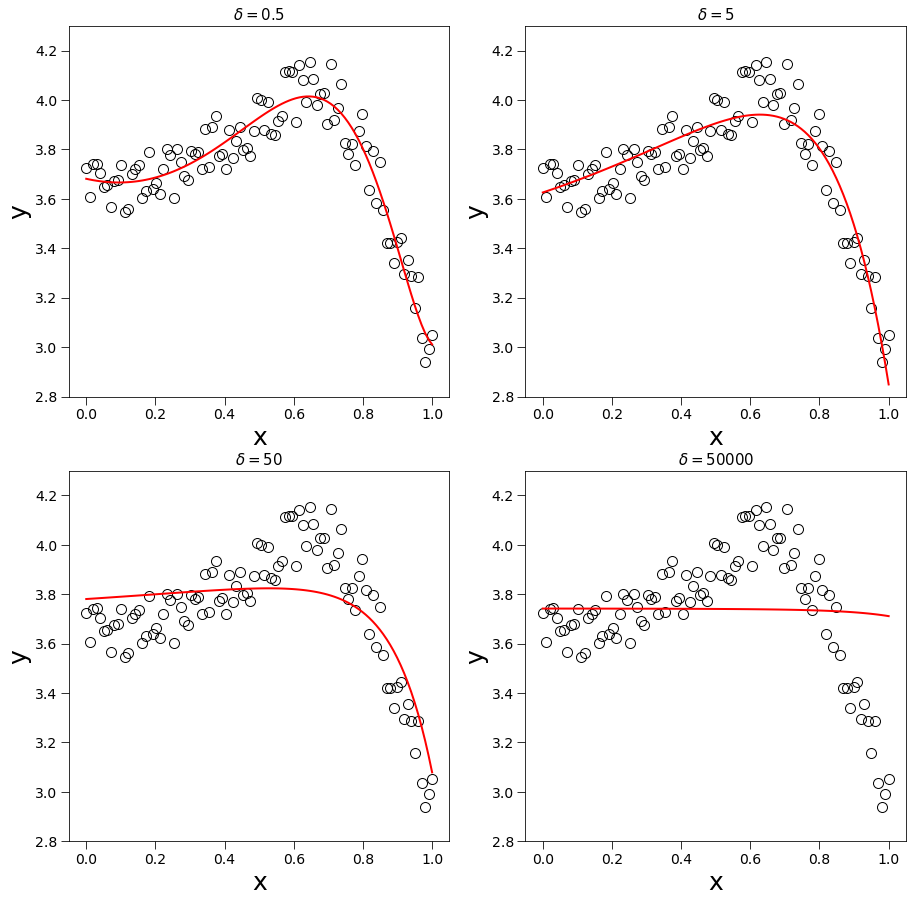

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[0][0].plot(x, y, 'ko', fillstyle='none', markersize=10)
ax[0][0].plot(x, y_hat_reg1, 'r-', linewidth=2)
ax[0][0].set_title(r'$\delta = 0.5$', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[0][1].plot(x, y, 'ko', fillstyle='none', markersize=10)
ax[0][1].plot(x, y_hat_reg2, 'r-', linewidth=2)
ax[0][1].set_title(r'$\delta = 5$', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[1][0].plot(x, y, 'ko', fillstyle='none', markersize=10)
ax[1][0].plot(x, y_hat_reg3, 'r-', linewidth=2)
ax[1][0].set_title(r'$\delta = 50$', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

ax[1][1].plot(x, y, 'ko', fillstyle='none', markersize=10)
ax[1][1].plot(x, y_hat_reg4, 'r-', linewidth=2)
ax[1][1].set_title(r'$\delta = 50000$', {'fontsize': 15,
                                     'verticalalignment': 'baseline',
                                     'horizontalalignment': 'center'})

for i in range(2):
    for j in range(2):
        ax[i][j].set_xlabel('x', fontsize=25)
        ax[i][j].set_ylabel('y', fontsize=25)
        ax[i][j].set_xlim(-0.05,1.05)
        ax[i][j].set_ylim(2.8,4.3)
        ax[i][j].tick_params(axis='both', which='major', labelsize=14, length=8)
        
plt.savefig(os.path.join('../images/', 'regularization.png'), bbox_inches='tight')

## The following concerns the ridge (L2) and lasso (L1) linear regression in Python (with 'sklearn' module). The notebook was originated from [ISL-Ridge-Lasso](https://github.com/marcopeix/ISL-Ridge-Lasso)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Visualize data

In [9]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
# Drop off the 2nd column.
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature), fontsize=18)
    plt.ylabel("Sales ($k)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

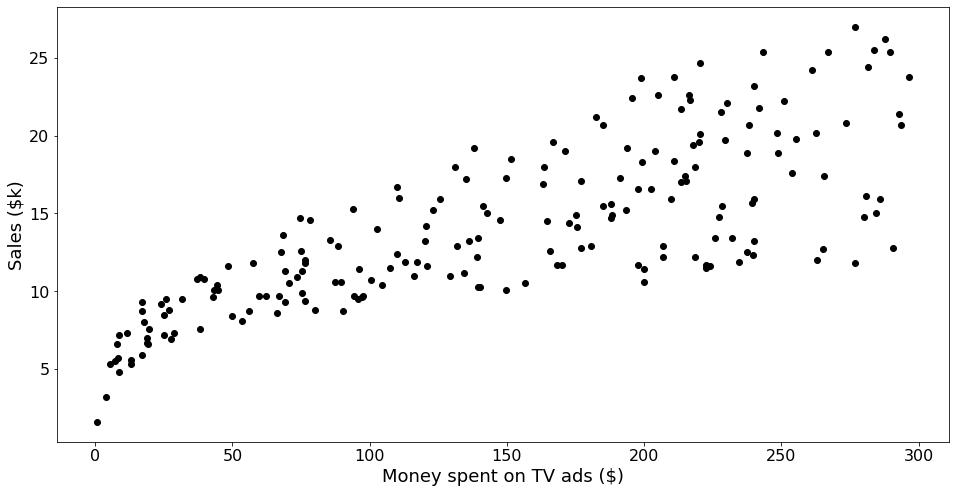

In [14]:
scatter_plot('TV', 'sales')

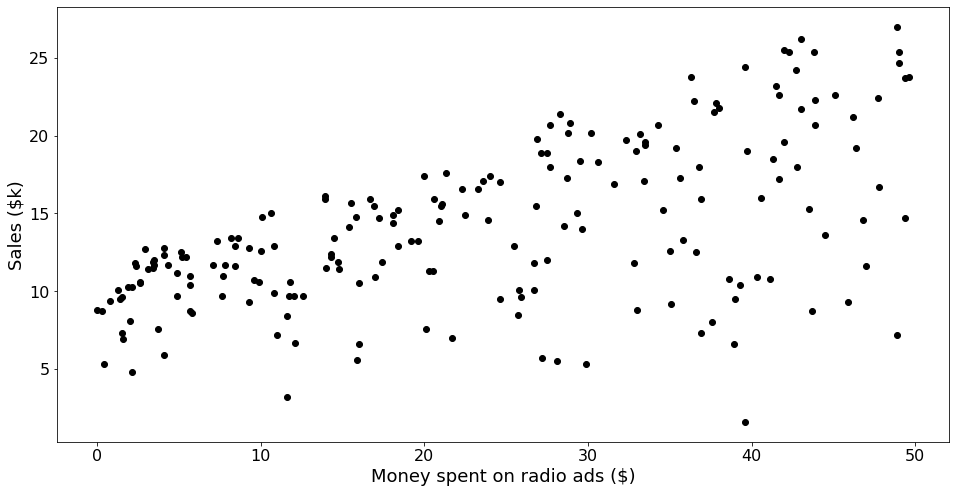

In [15]:
scatter_plot('radio', 'sales')

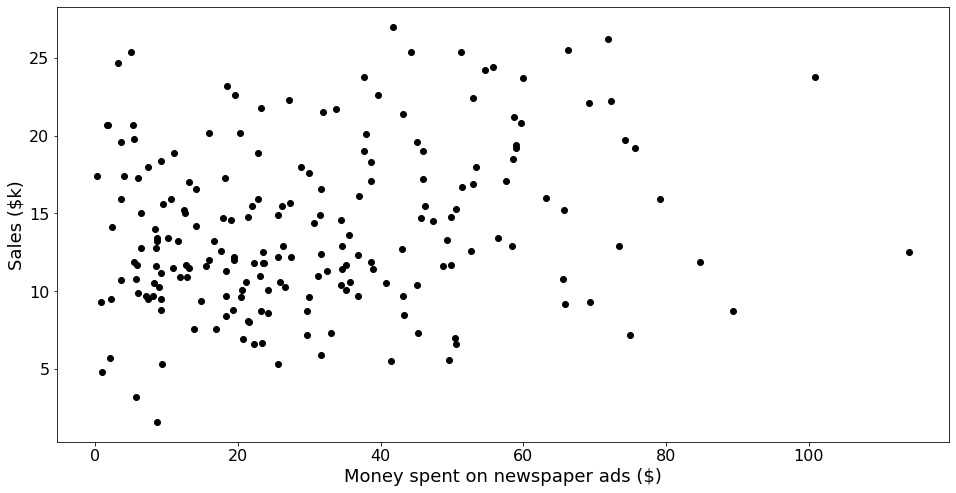

In [16]:
scatter_plot('newspaper', 'sales')

## Modelling 

### Multiple linear regression - least squares fitting 

In [17]:
# Import module for linear regression and cross validation.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

# The 'scoring' string here specifies the method for evalulating the cross-validation result.
# Refer to the following site for more information:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# MSE = Mean Squared Error.
MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print("Mean of 5-fold cross-validation MSE = ", mean_MSE)

Mean of 5-fold cross-validation MSE =  -3.0729465971002092


In [18]:
MSEs

array([-3.1365399 , -2.42566776, -1.58522508, -5.42615506, -2.79114519])

### Ridge regression 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [20]:
ridge_regressor.best_params_

{'alpha': 20}

In [21]:
ridge_regressor.best_score_

-3.0726713383411433

### Lasso 

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=20000)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=20000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [23]:
lasso_regressor.best_params_

{'alpha': 1}

In [24]:
lasso_regressor.best_score_

-3.041405896751369